In [1]:
from scipy import sparse
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import psycopg2
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
#conn = psycopg2.connect("dbname='cap' user='postgres' host='ec2-52-27-114-159.us-west-2.compute.amazonaws.com' port=9000 password ='secret'")
#data = pd.read_sql_query("SELECT * FROM nlp_dim ORDER BY id DESC LIMIT 300", conn)

In [3]:
x = sparse.load_npz('model/tf_idf.npz')

In [4]:
x

<1153x100 sparse matrix of type '<class 'numpy.float64'>'
	with 29458 stored elements in Compressed Sparse Row format>

In [24]:
# First we are going to PCA this vector data 
reduced_data = PCA(n_components=2).fit_transform(x.todense())

km = KMeans(init='k-means++', n_clusters=3, n_init=10)
km.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
reduced_data

array([[ 0.25519555, -0.41707293],
       [ 0.25519555, -0.41707293],
       [ 0.25519555, -0.41707293],
       ..., 
       [ 0.0695686 , -0.11958755],
       [-0.12812565, -0.01450895],
       [-0.21416777,  0.01164821]])

In [26]:
# step size of mesh
h = 0.05

x_min, x_max = reduced_data[:, 0].min(), reduced_data[:, 0].max() 
y_min, y_max = reduced_data[:, 1].min(), reduced_data[:, 1].max()

In [27]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [28]:
xx.shape

(23, 26)

In [29]:
yy.shape

(23, 26)

In [30]:
test_data = np.c_[xx.ravel(), yy.ravel()]
# test_data.shape
Z = km.predict(test_data)
Z.shape

(598,)

In [31]:
Z = Z.reshape(xx.shape)
Z.shape

(23, 26)

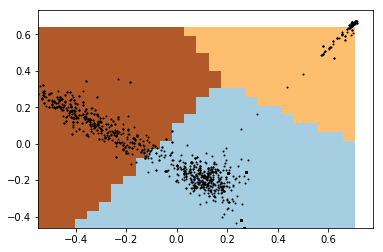

In [32]:
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.show()

In [33]:
reduced_data

array([[ 0.25519555, -0.41707293],
       [ 0.25519555, -0.41707293],
       [ 0.25519555, -0.41707293],
       ..., 
       [ 0.0695686 , -0.11958755],
       [-0.12812565, -0.01450895],
       [-0.21416777,  0.01164821]])